In [12]:
%matplotlib inline

import json
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def getGraphData(data):
    x =[]
    x_length = len(data["0"]["x"])
    for i in range(x_length):
        x.append(data["0"]["x"][i])
    mean = []
    variance = []
    minValue = []
    maxValue = []
    sd = []
    length = len(data["0"]["y"])
    #print(length)
    for j in range(length):
        dataarray = []
        for i in data:
            dataarray.append(data[i]["y"][j])
        mean.append(np.mean(dataarray))
        variance.append(np.var(dataarray))
        maxValue.append(np.amax(dataarray))
        minValue.append(np.amin(dataarray))
        sd.append(np.std(dataarray))
    
    stdUp = np.add(mean ,sd)
    stdDown = np.subtract(mean ,sd)
    
    return x,mean,stdUp,stdDown

def meanAndStandardError(data):
    acc = []
    
    for i in data:
        acc.append(data[i]["y"][199])
        print(data[i]["y"][199])
    
    mean = np.mean(acc)
    standardError = np.std(acc)/np.sqrt(3)
    return mean,standardError

def buildGraphs(file, name, value):
    data = json.load(open(file))
    x,mean,stdUp,stdDown = getGraphData(data)
    last_epoch_mean, last_epoch_ste = meanAndStandardError(data)
    print("")
    print("Mean and Standard Error")
    print(last_epoch_mean, last_epoch_ste)
    plt.rc('font',size=14)
    plt.plot(x, mean, label=value)
    plt.legend(loc='best')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(plt.ylim()[0], 1.0)
    #plt.yticks(np.arange(0, 1.0, 0.1))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.tight_layout()
    plt.fill_between(x, stdUp, stdDown, alpha='0.5')
    plt.savefig(name)
    #plt.figure()

    
def doEverything(dataSources, saveFile, label):
    j = 0
    for i in dataSources:
        buildGraphs(i, saveFile, label[j])
        print("")
        j = j+1
    

0.939403044872
0.941506410256
0.944911858974

Mean and Standard Error
0.941940438034 0.00131047432351

0.699819711538
0.690404647436
0.853866185897

Mean and Standard Error
0.748030181624 0.0432643186533



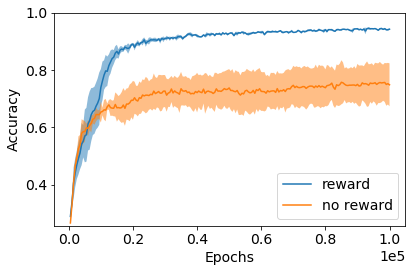

In [60]:
doEverything(["dropout_0.25_reward_acc.json", "dropout_0.25_no_reward_acc.json"],
             "dropout_0.25.eps",
             ["reward", "no reward"])

0.920973557692
0.915765224359
0.916866987179

Mean and Standard Error
0.917868589743 0.00129392510513

0.609375
0.634314903846
0.594451121795

Mean and Standard Error
0.612713675214 0.00949432981649



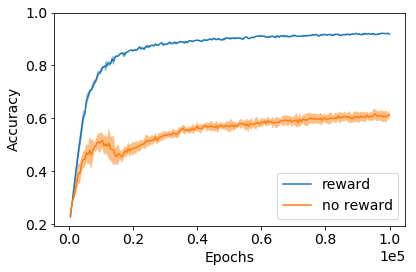

In [61]:
doEverything(["dropout_0.75_reward_acc.json", "dropout_0.75_no_reward_acc.json"],
             "dropout_0.75.eps",
             ["reward", "no reward"])

0.932291666667
0.928185096154
0.915865384615

Mean and Standard Error
0.925447382479 0.00402980541684

0.656149839744
0.657752403846
0.640825320513

Mean and Standard Error
0.651575854701 0.00440511172568



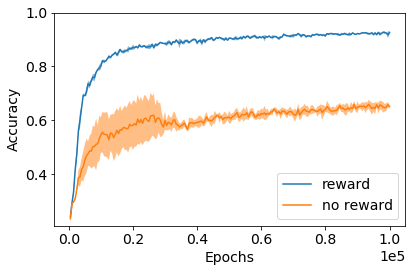

In [62]:
doEverything(["mg_reward_acc.json", "mg_no_reward_acc.json"],
             "mg.eps",
             ["reward", "no reward"])

0.940805288462
0.950721153846
0.946113782051

Mean and Standard Error
0.945880074786 0.00233913853528

0.720452724359
0.726262019231
0.750100160256

Mean and Standard Error
0.732271634615 0.00740614191987



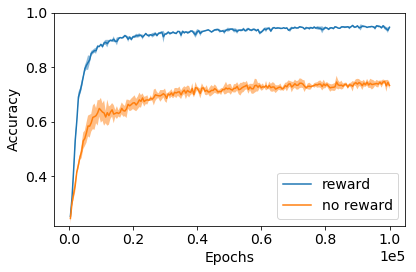

In [63]:
doEverything(["concrete_reward_acc.json", "concrete_no_reward_acc.json"],
             "concrete.eps",
             ["reward", "no reward"])

0.940805288462
0.950721153846
0.946113782051

Mean and Standard Error
0.945880074786 0.00233913853528

0.932291666667
0.928185096154
0.915865384615

Mean and Standard Error
0.925447382479 0.00402980541684

0.939403044872
0.941506410256
0.944911858974

Mean and Standard Error
0.941940438034 0.00131047432351

0.920973557692
0.915765224359
0.916866987179

Mean and Standard Error
0.917868589743 0.00129392510513



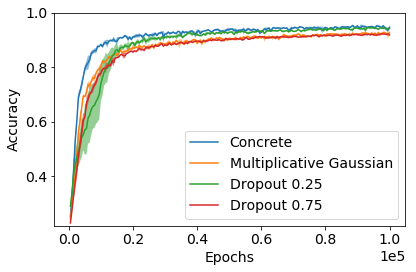

In [64]:
doEverything(["concrete_reward_acc.json", "mg_reward_acc.json", "dropout_0.25_reward_acc.json", 
              "dropout_0.75_reward_acc.json"],
             "compare_Srts.eps",
             ["Concrete", "Multiplicative Gaussian", "Dropout 0.25", "Dropout 0.75"])

0.935496794872
0.958032852564
0.954326923077

Mean and Standard Error
0.949285523504 0.0056965926719

0.940805288462
0.950721153846
0.946113782051

Mean and Standard Error
0.945880074786 0.00233913853528

0.720452724359
0.726262019231
0.750100160256

Mean and Standard Error
0.732271634615 0.00740614191987



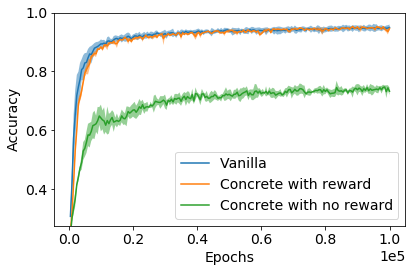

In [65]:
doEverything(["vanilla_acc.json","concrete_reward_acc.json", "concrete_no_reward_acc.json",],
             "compare_models.eps",
             ["Vanilla", "Concrete with reward", "Concrete with no reward"])